In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
R=1800 #in Ohm
L=0.1 # In Henry
C=1e-7 # In Farad

other_curve=True
R2=4000
L2=0.1
C2=1e-7


tmin,tmax=0,0.01 # in seconds
nb_points=1000 # to compute time array

i_0=0
di_dt_0=10

In [11]:
def canon(R,L,C):
    omega_0=1/np.sqrt(L*C)
    Q=np.sqrt(L/C)/R
    delta=omega_0**2/Q**2-4*omega_0**2
    return(omega_0,Q,delta)

omega1,Q1,delta1=canon(R,L,C)
omega2,Q2,delta2=canon(R2,L2,C2)
print(delta2)
t=np.linspace(tmin,tmax,nb_points)

1199999999.9999993


Aperiodic :
$i(t)=Ae^{\lambda_+t}+Be^{\lambda_-t}$ with $\lambda_\pm=-\frac{\omega_0}{2Q}\pm\omega_0\sqrt{\frac{1}{4Q^2}-1},\  A=\frac{\lambda_-i(0)-\partial_ti(0)}{\lambda_--\lambda_+},\ B=\frac{\lambda_+i(0)-\partial_ti(0)}{\lambda_+-\lambda_-}$


Pseudo-periodic : $i(t)=e^{-\frac{t}{\tau}}(A\cos{\Omega t}+B\sin{\Omega t})$, with $\tau=\frac{2Q}{\omega_0},\ \Omega=\omega_0\sqrt{1-\frac{1}{4Q^2}},\ A=i(0),\  B=\frac{\partial_ti(0)}{\Omega}$

Critical : $i(t)=(A+Bt)\ e^{-\frac{t}{\tau}}$ with $\tau=-\frac{2Q}{\omega_0},\ A=i(0), \ B=\partial_ti(0)-\frac{i(0)}{\tau}$

In [12]:
def i(t,omega=omega1,Q=Q1,delta=delta1):
    
    if delta>0:
        lambda_p=-omega/(2*Q)+omega*np.sqrt(1/(4*Q**2)-1)
        lambda_m=-omega/(2*Q)-omega*np.sqrt(1/(4*Q**2)-1)
        A=(lambda_m*i_0-di_dt_0)/(lambda_m-lambda_p)
        B=(lambda_p*i_0-di_dt_0)/(lambda_p-lambda_m)
        return(A*np.exp(lambda_p*t)+B*np.exp(lambda_m*t))
    
    elif delta<0:
        tau=2*Q/omega
        Omega=omega*np.sqrt(1-1/(4*Q**2))
        A=i_0
        B=di_dt_0/Omega
        return(np.exp(-t/tau)*(A*np.cos(Omega*t)+B*np.sin(Omega*t)))
    
    else :
        tau=2*Q/omega
        A=i_0
        B=di_dt_0-i_0/tau
        return((A+B*t)*np.exp(-t/tau))

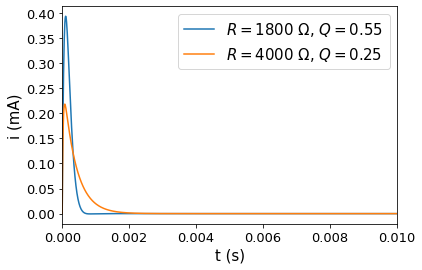

In [13]:
fig,ax=plt.subplots(figsize=(6,4))
ax.plot(t,i(t)*1000,label=r'$R=$'+str(R)+' '+r'$\Omega$'+', '+r'$Q=$'+str((Q1//0.01)*0.01))
if other_curve:
    ax.plot(t,i(t,omega2,Q2,delta2)*1000,label=r'$R=$'+str(R2)+' '+r'$\Omega$'+', '+r'$Q=$'+str((Q2//0.01)*0.01))
ax.set_xlim(tmin,tmax)
ax.set_xlabel('t (s)',fontsize=15)
ax.set_ylabel('i (mA)',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=15)
plt.savefig('./colles/colles_elec/regime_pseudo.pdf')